In [2]:
from brian2 import *


prefs.codegen.target = "numpy"

In [29]:
C_m = 20 * pF

g_Naf = 50 * nsiemens
g_Nas = 100 * nsiemens  # variable
g_K = 40 * nsiemens
g_l = 5 * nsiemens

E_Na = 55 * mV
E_K = -85 * mV
E_r = -70 * mV
E_l = -70 * mV


eqs = """
dV/dt = (Iinp - I_Nas - I_Naf - I_K - I_l) / C_m : volt

Iinp : ampere
I_Naf = 0*amp : ampere
I_K = 0*amp : ampere
I_l = g_l * (V - E_l) : ampere

I_Nas = g_Nas * m_Nas**3 * h_Nas * (V - E_Na) : ampere


dm_Nas/dt = alpha_mNas * (1 - m_Nas) - beta_mNas * m_Nas : 1
alpha_mNas = exp(0.039*V/mV - 0.56)/second : 1/second
beta_mNas = exp(-0.049*V/mV - 2.53)/second : 1/second
dh_Nas/dt = alpha_hNas * (1 - h_Nas) - beta_hNas * h_Nas : 1
alpha_hNas = 0.002 * exp(-V/mV/30)/second : Hz
beta_hNas = 0.1/(1 + 0.2*exp(-(V/mV+10)/7))/second : Hz
"""

testnr = NeuronGroup(1, eqs, method='euler')

teststmon = StateMonitor(testnr, 'V', True)

testnr.V = E_l

run(20*ms, report='text')
testnr.V = -50*mV
run(30*ms, report='text')
testnr.Iinp = .1*nA
run(50*ms, report='text')
testnr.Iinp = 1*nA
run(50*ms)

Starting simulation at t=0. s for a duration of 20. ms
20. ms (100%) simulated in < 1s
Starting simulation at t=20. ms for a duration of 30. ms
30. ms (100%) simulated in < 1s
Starting simulation at t=50. ms for a duration of 50. ms
50. ms (100%) simulated in < 1s


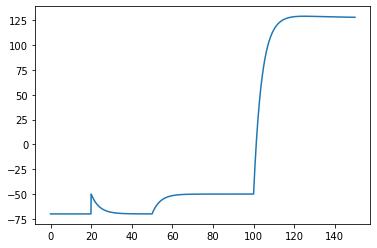

In [30]:
plot(teststmon.t/ms, teststmon.V[0]/mV)

In [ ]:
dh_Nas/dt = alpha_hNas * (1 - h_Nas) - beta_hNas * h_Nas : 1

alpha_mNas = 0.05 * (1 + exp(V/mV + 44)) / (1 + exp((V/mV - 7)/10))/second : 1/second
beta_mNas = 0.05 * (1 + exp(-(V/mV + 6)/16))/second : 1/second

alpha_r = 1e-4 * exp(-(V/mv + 8)/29) + 8e-4 : 1
beta_r = 3e-4 / (1 + 0.24 * exp(-(V/mv + 23)/10)) : 1
    
dh_Naf/dt = alpha_hNaf * (1 - h_Naf) - beta_hNaf * h_Naf : 1
dm_Naf/dt = alpha_mNaf * (1 - m_Naf) - beta_m_Naf * m_Naf : 1
dn/dt = alpha_n * (1 - n) - beta_n * n : 1
dr_Nas/dt = alpha_r * (1 - r_Nas) - beta_r * r_Nas : 1


In [ ]:
# Brian's equation with Krylov parameters
# Parameters
area = 20000*umetre**2
Cm = 20 * pfarad  # was 200 pF
gl = 5 * nsiemens
El = -70*mV
EK = -85*mV
ENa = 55*mV
g_nas = 75 * nsiemens  # 200
g_na = 50 * nsiemens  # was 20uS
g_kd = 40 * nsiemens  # was 6uS
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) - g_nas*INas + I)/Cm : volt
INas = (v-ENa) * m_s**3*h : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
dm_s/dt = ams * (1 - m_s) - bms * m_s : 1
ams = 0.05 * (1 + exp(v/mV + 40)/8)/(1 + exp(v/mV - 11)/10)/ms : Hz
bms = 0.05 * (1 + exp(-(v/mV + 2))/16)/ms : Hz

I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(1, eqs,
                    threshold='v > -40*mV',
                    refractory='v > -40*mV',
                    method='exponential_euler')
group.v = El
stmon = StateMonitor(group, 'v', True)

run(10*ms)
group.I = 110*pA
run(200*ms)
group.I = 0 * pA
run(50*ms)

In [40]:
# Brian's equation with Krylov parameters
# Parameters
Cm = 20 * pfarad  # was 200 pF
gl = 5 * nsiemens
El = -70*mV
EK = -85*mV
ENa = 55*mV
g_nas = 75 * nsiemens  # 200
g_naf = 50 * nsiemens  # was 20uS
g_na = 50 * nsiemens
g_kd = 40 * nsiemens  # was 6uS
VT = -63*mV

# The model
eqs = Equations('''
dv/dt = (gl*(El-v) - g_kd*(n*n*n*n)*(v-EK) - g_nas*INas - g_naf*INaf - g_na*INa + I)/Cm : volt
INa = m**3 * h * (v - ENa) : volt
dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)-4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1

INas = (v-ENa) * m_s**3*h_s : volt
INaf = (v - ENa) * m_s**3 * h_f : volt
dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
dm_s/dt = ams * (1 - m_s) - bms * m_s : 1
ams = 0.05 * (1 + exp(v/mV + 40)/8)/(1 + exp(v/mV - 11)/10)/ms : Hz
bms = 0.05 * (1 + exp(-(v/mV + 2))/16)/ms : Hz
dh_s/dt = ahs * (1 - h_s) - bhs * h_s : 1
dh_f/dt = ahf * (1 - h_f) - bhf * h_f : 1
ahs = 0.002 * exp(-v/mV/30)/ms : Hz
bhs = 0.1/(1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz
ahf = 0.012 * exp(-(v/mV + 43)/10)/ms : Hz
bhf = 1.32 / (1 + 0.2 * exp(-(v/mV + 10)/7))/ms : Hz

I : amp
''')
# Threshold and refractoriness are only used for spike counting
group = NeuronGroup(1, eqs,
                    method='exponential_euler')
group.v = El
stmon = StateMonitor(group, 'v', True)

run(10*ms)
group.I = 180*pA
run(200*ms)
group.I = 0 * pA
run(50*ms)

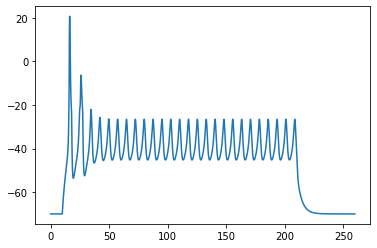

In [41]:
plot(stmon.t/ms, stmon.v[0]/mV)